In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 

In [3]:
data = pd.read_csv('StudentsPerformance.csv')
df = pd.DataFrame(data)

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [5]:
#Check for missing values
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

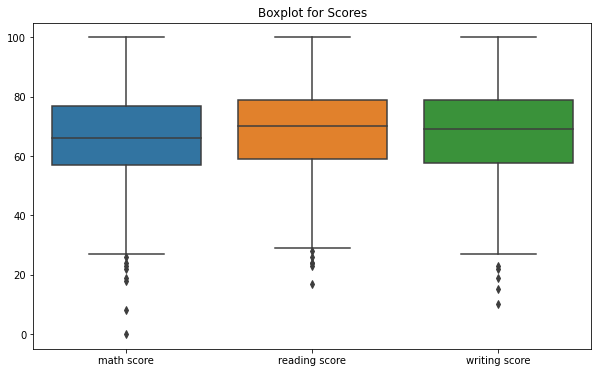

In [6]:
#Checking for outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['math score', 'reading score', 'writing score']])  
plt.title('Boxplot for Scores')
plt.show()

### Data Visualization

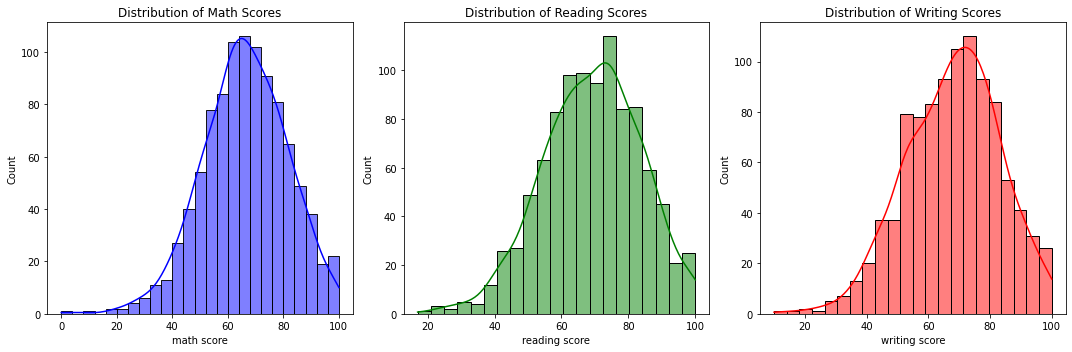

In [7]:
#Visualizing the distribution of scores
plt.figure(figsize=(15, 5)) 
plt.subplot(1, 3, 1)
sns.histplot(df['math score'], kde=True, color='blue')
plt.title('Distribution of Math Scores')
plt.subplot(1, 3, 2)
sns.histplot(df['reading score'], kde=True, color='green')
plt.title('Distribution of Reading Scores')
plt.subplot(1, 3, 3)
sns.histplot(df['writing score'], kde=True, color='red')
plt.title('Distribution of Writing Scores')
plt.tight_layout()
plt.show()

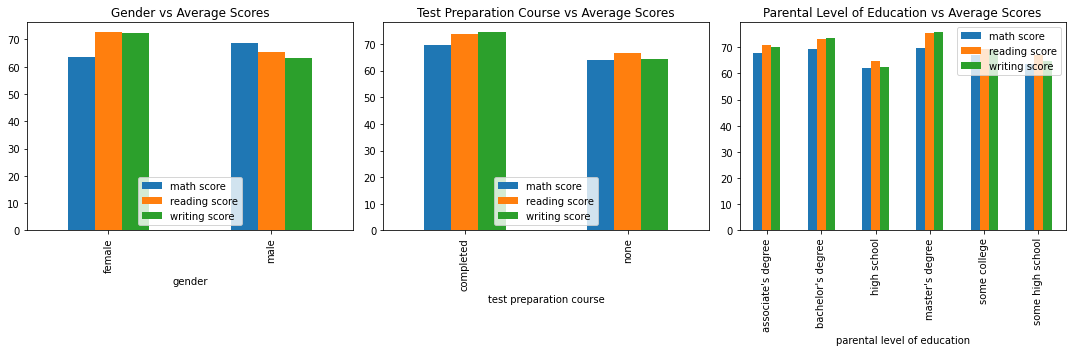

In [8]:
#Bivariate Analysis
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
df.groupby("gender")[["math score", "reading score", "writing score"]].mean().plot(kind='bar', ax=plt.gca())
plt.title("Gender vs Average Scores")
plt.subplot(1, 3, 2)
df.groupby("test preparation course")[["math score", "reading score", "writing score"]].mean().plot(kind='bar', ax=plt.gca())
plt.title("Test Preparation Course vs Average Scores")
plt.subplot(1, 3, 3)
df.groupby("parental level of education")[["math score", "reading score", "writing score"]].mean().plot(kind='bar', ax=plt.gca())
plt.title("Parental Level of Education vs Average Scores")
plt.tight_layout()
plt.show()

### Statistics

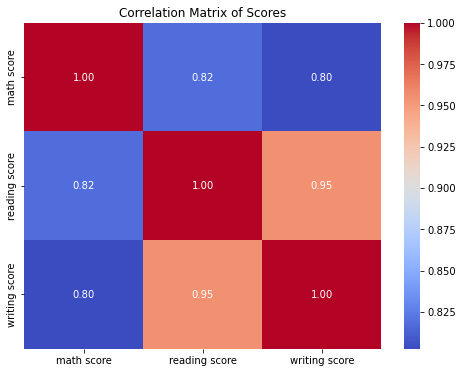

In [9]:
# Correlation Analysis
plt.figure(figsize=(8, 6))
corr = df[['math score', 'reading score', 'writing score']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Scores')
plt.show()

In [ ]:
#Gender comparison using t-test
male_math_scores = df[df["gender"] == "male"]["math score"]
female_math_scores = df[df["gender"] == "female"]["math score"]

t_stat, p_value = stats.ttest_ind(male_math_scores, female_math_scores)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: 5.383245869828983, P-value: 9.120185549328822e-08


In [15]:
#Chi-square test for independence between categorical variables
df["result"] = np.where((df["math score"] >= 50) & (df["reading score"] >= 50) & (df["writing score"] >= 50), "pass", "fail")
contingency_table = pd.crosstab(df["result"], df["test preparation course"])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f"Chi-square Statistic: {chi2}, P-value: {p}")

Chi-square Statistic: 27.04470796681993, P-value: 1.9880374179555502e-07
